# Approaching categorical variables
- [Categorical Feature Encoding Challenge II](https://www.kaggle.com/c/cat-in-the-dat-ii)
- [Adult](https://archive.ics.uci.edu/ml/datasets/adult)

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cat_train.csv", index_col="id")
df

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,Theremin,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,Oboe,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,Theremin,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0


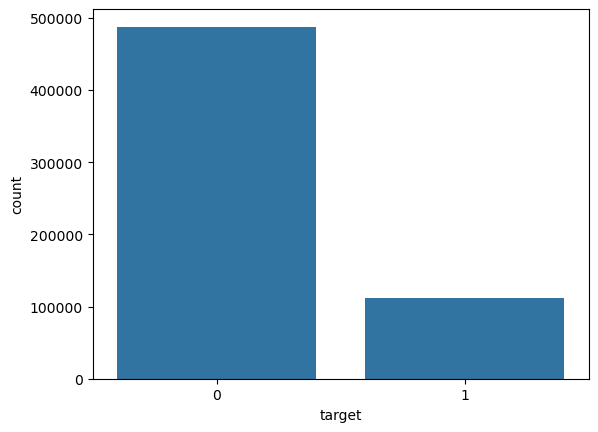

In [3]:
sns.countplot(x="target", data=df);

In [4]:
df.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

## Label Encoding

In [5]:
print(df.ord_2.unique())

print(df.ord_2.value_counts())

mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}

df.loc[:, "ord_2"] = df.ord_2.map(mapping)

print(df.ord_2.value_counts())

['Hot' 'Warm' 'Freezing' 'Lava Hot' 'Cold' 'Boiling Hot' nan]
ord_2
Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: count, dtype: int64
ord_2
0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: count, dtype: int64


In [6]:
import pandas as pd
from sklearn import preprocessing

# read the data
df = pd.read_csv("../data/cat_train.csv")

# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()

# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

## Sparse format

In [7]:
import numpy as np

# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)

# print size in bytes
print(example.nbytes)

72


In [8]:
import numpy as np
from scipy import sparse

# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(sparse_example.data.nbytes)
print(
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

32
64


In [9]:
import numpy as np
from scipy import sparse

# number of rows
n_rows = 10000

# number of columns
n_cols = 100000

# create random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))

# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")

full_size = (
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 399968024
Full size of sparse array: 599992040


## One-Hot Encoding

In [10]:
import numpy as np
from scipy import sparse

# create binary matrix
example = np.array(
    [
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]
    ]
)
# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")

full_size = (
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 144
Size of sparse array: 24
Full size of sparse array: 52


In [11]:
import numpy as np
from sklearn import preprocessing

# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)

# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse_output=False)

# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")

# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse_output=True)

# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")

full_size = (
    ohe_example.data.nbytes +
    ohe_example.indptr.nbytes +
    ohe_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


---

In [12]:
df = pd.read_csv("../data/cat_train.csv")

In [13]:
df[df.ord_2 == "Boiling Hot"].shape

(84790, 25)

In [14]:
df.groupby(["ord_2"])["id"].count()
# df["ord_2"].value_counts()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

In [15]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

In [16]:
df.groupby(
    [
        "ord_1",
        "ord_2"
    ]
)["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


In [17]:
df["new_feature"] = (
    df.ord_1.astype(str)
    + "_"
    + df.ord_2.astype(str)
)
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

In [18]:
df["new_feature"] = (
    df.ord_1.astype(str)
    + "_"
    + df.ord_2.astype(str)
    + "_"
    + df.ord_3.astype(str)
)
df.new_feature

0                 Contributor_Hot_c
1                Grandmaster_Warm_e
2                    nan_Freezing_n
3                 Novice_Lava Hot_a
4                Grandmaster_Cold_h
                    ...            
599995            Novice_Freezing_a
599996         Novice_Boiling Hot_n
599997       Contributor_Freezing_n
599998                Master_Warm_m
599999    Contributor_Boiling Hot_b
Name: new_feature, Length: 600000, dtype: object

In [19]:
df.ord_2.value_counts()

ord_2
Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: count, dtype: int64

In [20]:
df.ord_2.fillna("NONE").value_counts()

ord_2
Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: count, dtype: int64

In [21]:
import pandas as pd
from sklearn import preprocessing

# read training data
train = pd.read_csv("../data/cat_train.csv")

#read test data
test = pd.read_csv("../data/cat_test.csv")

# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1

# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)

# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]

# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [22]:
df.ord_4.fillna("NONE").value_counts()

ord_4
N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: count, dtype: int64

In [23]:
df.ord_4 = df.ord_4.fillna("NONE")

df.loc[
    df["ord_4"].value_counts()[df["ord_4"]].values < 2000,
    "ord_4"
] = "RARE"

df.ord_4.value_counts()

ord_4
N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: count, dtype: int64

---

In [24]:
import pandas as pd
df = pd.read_csv("../project_cat/input/cat_train_folds.csv")

In [25]:
df.kfold.value_counts()

kfold
0    120000
1    120000
2    120000
3    120000
4    120000
Name: count, dtype: int64

In [26]:
df[df.kfold==0].target.value_counts()

target
0    97536
1    22464
Name: count, dtype: int64

In [27]:
df[df.kfold==1].target.value_counts()

target
0    97536
1    22464
Name: count, dtype: int64

In [28]:
df[df.kfold==2].target.value_counts()

target
0    97535
1    22465
Name: count, dtype: int64

In [29]:
df[df.kfold==3].target.value_counts()

target
0    97535
1    22465
Name: count, dtype: int64

In [30]:
df[df.kfold==4].target.value_counts()

target
0    97535
1    22465
Name: count, dtype: int64

---

In [10]:
import pandas as pd
df = pd.read_csv("../data/adult.data",
                 names=["age", "workclass", "fnlwgt", "education", "education.num", "marital.status",
                        "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss",
                        "hours.per.week", "native.country", "income"])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.income.value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [13]:
df.to_csv("../project_adult/input/adult.csv")

In [15]:
df1 = df[df.isna().any(axis=1)]
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
